TRAINING RESULTS:
CONFUSION MATRIX:
 [[1245    2]
 [   8  221]]
ACCURACY SCORE:
 0.9932249322493225
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00      1247
        True       0.99      0.97      0.98       229

    accuracy                           0.99      1476
   macro avg       0.99      0.98      0.99      1476
weighted avg       0.99      0.99      0.99      1476


TESTING RESULTS:
CONFUSION MATRIX:
 [[512  24]
 [ 67  30]]
ACCURACY SCORE:
 0.8562401263823065
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.88      0.96      0.92       536
        True       0.56      0.31      0.40        97

    accuracy                           0.86       633
   macro avg       0.72      0.63      0.66       633
weighted avg       0.83      0.86      0.84       633

TRAINING RESULTS:
CONFUSION MATRIX:
 [[1245    2]
 [   8  221]]
ACCURACY SCORE:
 0.9932249322493225
CL

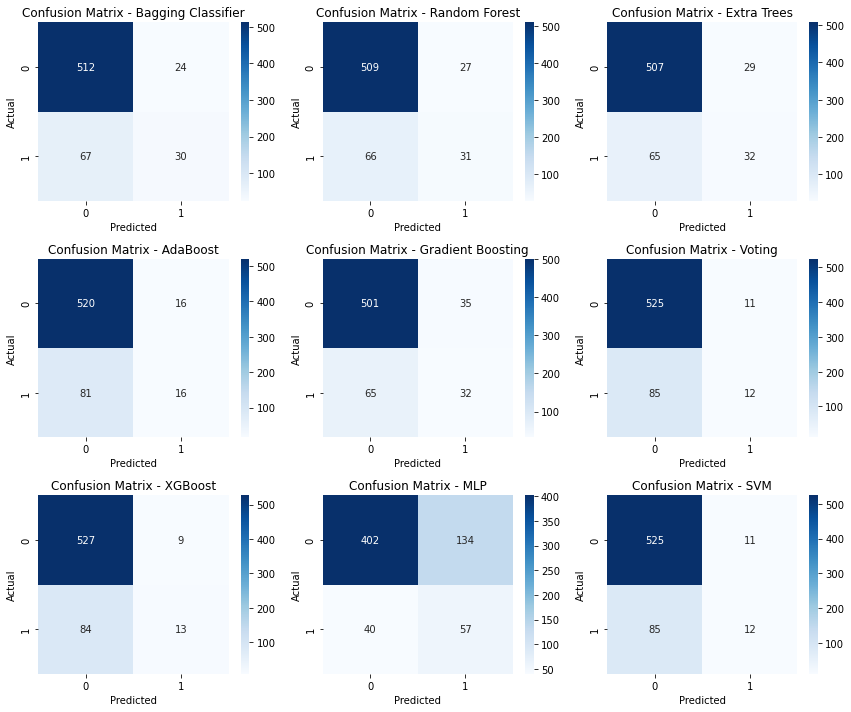

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import plot_importance

# Load the dataset
df = pd.read_csv("C:/Users/hp/Desktop/srp-class-csv.csv")

# Check for missing values
df.isnull().sum()

# Define feature columns and handle missing values
feature_columns = ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'lOCode And Comment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount','CLASS']

# Rename the columns
df.columns = feature_columns

# Split the data into train and test sets
X = df[feature_columns].drop("CLASS",axis=1)
y = df['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Evaluate function
def evaluate(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("TRAINING RESULTS:")
    print("===============================")
    print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
    print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
    print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))

    print("\nTESTING RESULTS:")
    print("===============================")
    print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
    print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
    print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred))

    return confusion_matrix(y_test, y_test_pred), accuracy_score(y_test, y_test_pred)

# Initialize lists to store results
confusion_matrices = []
accuracy_scores = []

# Bagging Classifier
tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1000, random_state=1)
bagging_clf.fit(X_train, y_train)
confusion_matrix_bagging, accuracy_bagging = evaluate(bagging_clf, X_train, X_test, y_train, y_test)
confusion_matrices.append(confusion_matrix_bagging)
accuracy_scores.append(('Bagging Classifier', accuracy_bagging))

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=1, n_estimators=1500)
rf_clf.fit(X_train, y_train)
confusion_matrix_rf, accuracy_rf = evaluate(rf_clf, X_train, X_test, y_train, y_test)
confusion_matrices.append(confusion_matrix_rf)
accuracy_scores.append(('Random Forest', accuracy_rf))

# Extra Trees Classifier
ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=1)
ex_tree_clf.fit(X_train, y_train)
confusion_matrix_ex_tree, accuracy_ex_tree = evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)
confusion_matrices.append(confusion_matrix_ex_tree)
accuracy_scores.append(('Extra Trees', accuracy_ex_tree))

# AdaBoost Classifier
ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
confusion_matrix_ada_boost, accuracy_ada_boost = evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)
confusion_matrices.append(confusion_matrix_ada_boost)
accuracy_scores.append(('AdaBoost', accuracy_ada_boost))

# Gradient Boosting Classifier
grad_boost_clf = GradientBoostingClassifier(n_estimators=1500,random_state=1)
grad_boost_clf.fit(X_train, y_train)
confusion_matrix_grad_boost, accuracy_grad_boost = evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)
confusion_matrices.append(confusion_matrix_grad_boost)
accuracy_scores.append(('Gradient Boosting', accuracy_grad_boost))

# Voting Classifier
estimators = [('Logistic', LogisticRegression(solver='liblinear')),
              ('Tree', DecisionTreeClassifier()),
              ('SVM', SVC(gamma='scale'))]
voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)
confusion_matrix_voting, accuracy_voting = evaluate(voting, X_train, X_test, y_train, y_test)
confusion_matrices.append(confusion_matrix_voting)
accuracy_scores.append(('Voting', accuracy_voting))

# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective="binary:logistic", colsample_bytree=0.3, learning_rate=0.1,
                            max_depth=5, alpha=10, n_estimators=50)
xgb_clf.fit(X_train, y_train)
confusion_matrix_xgb, accuracy_xgb = evaluate(xgb_clf, X_train, X_test, y_train, y_test)
confusion_matrices.append(confusion_matrix_xgb)
accuracy_scores.append(('XGBoost', accuracy_xgb))

# MLP Classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(22,22,22),activation='relu', max_iter=1000)
mlp_clf.fit(X_train, y_train)
confusion_matrix_mlp, accuracy_mlp = evaluate(mlp_clf, X_train, X_test, y_train, y_test)
confusion_matrices.append(confusion_matrix_mlp)
accuracy_scores.append(('MLP', accuracy_mlp))

# SVM Classifier
svm_clf = SVC(gamma='scale',random_state = None)
svm_clf.fit(X_train, y_train)
confusion_matrix_svm, accuracy_svm = evaluate(svm_clf, X_train, X_test, y_train, y_test)
confusion_matrices.append(confusion_matrix_svm)
accuracy_scores.append(('SVM', accuracy_svm))
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'black', 'brown']

# Plot the confusion matrix heatmap
plt.figure(figsize=(12, 10))
for i, (cm, title) in enumerate(zip(confusion_matrices, accuracy_scores), 1):
    plt.subplot(3, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title[0]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

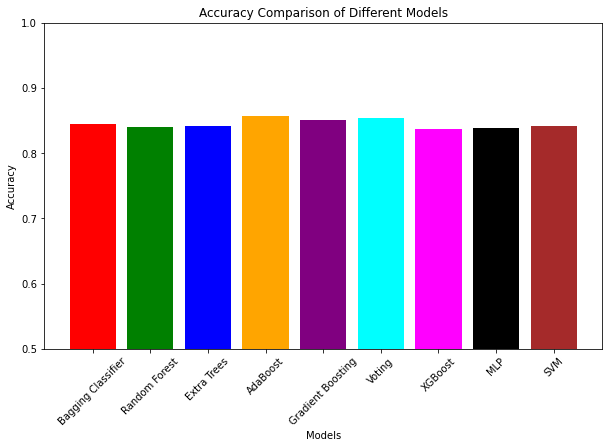

In [7]:
# Plot the accuracy comparison histogram
models, scores = zip(*accuracy_scores)
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.show()


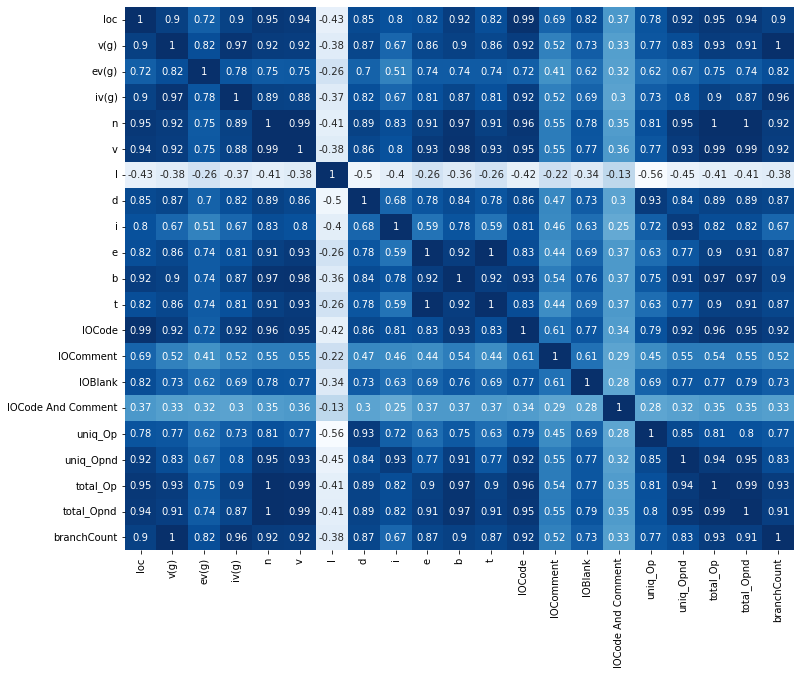

In [10]:
corr_matt = X.corr()
plt.figure(figsize=(12,10))
corr = sns.heatmap(corr_matt, annot=True, cmap='Blues', cbar=False)

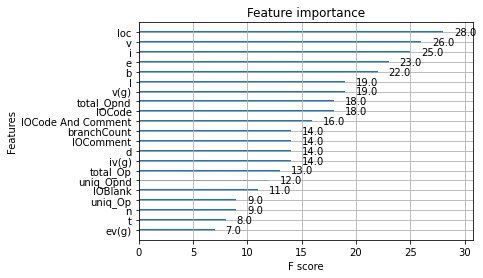

<Figure size 1152x864 with 0 Axes>

In [11]:
plot_importance(xgb_clf)
plt.figure(figsize=(16, 12))
plt.show()

Shape of the dataset: (2109, 22)
Columns: Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'lOCode And Comment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'CLASS'],
      dtype='object')
Data types:
 loc                   float64
v(g)                  float64
ev(g)                 float64
iv(g)                 float64
n                     float64
v                     float64
l                     float64
d                     float64
i                     float64
e                     float64
b                     float64
t                     float64
lOCode                  int64
lOComment               int64
lOBlank                 int64
lOCode And Comment      int64
uniq_Op               float64
uniq_Opnd             float64
total_Op              float64
total_Opnd            float64
branchCount           float64
CLASS                    bool
dtype: object
Summary statistics:
    

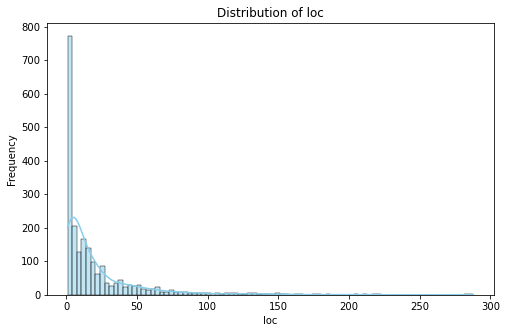

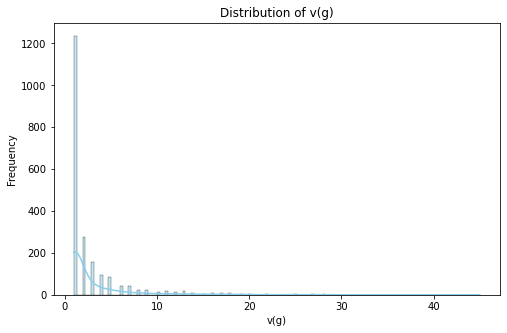

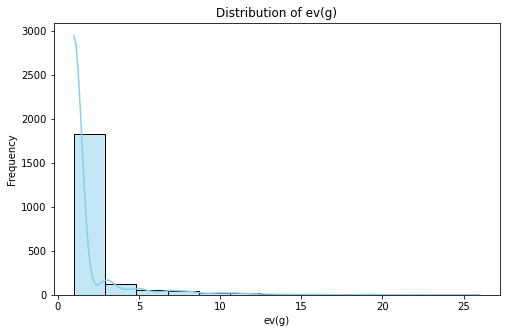

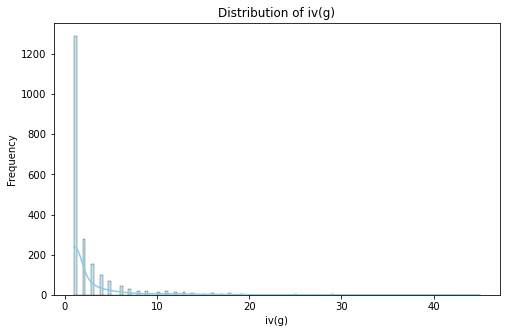

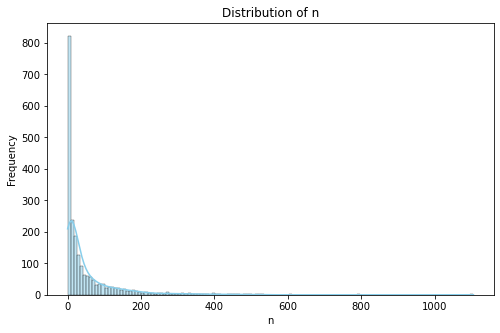

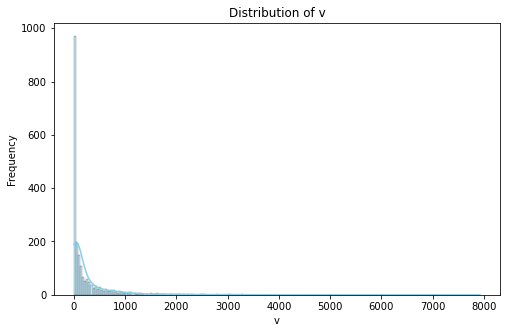

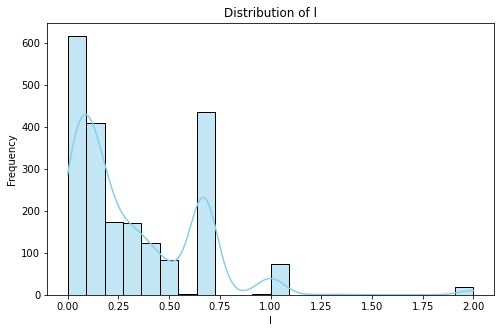

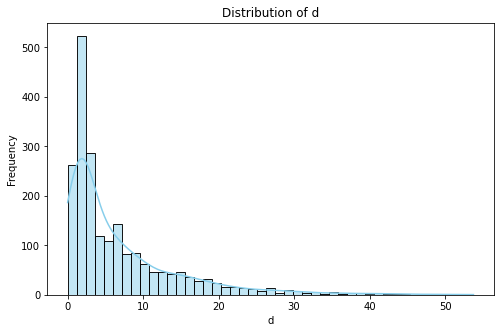

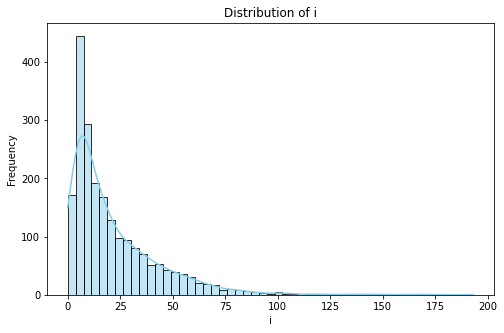

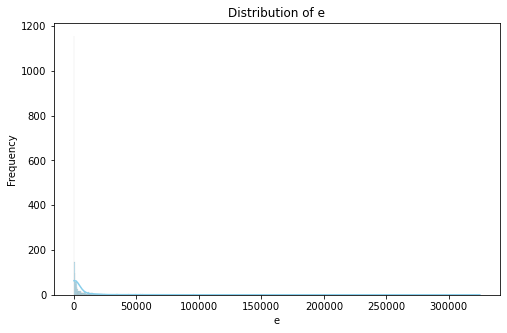

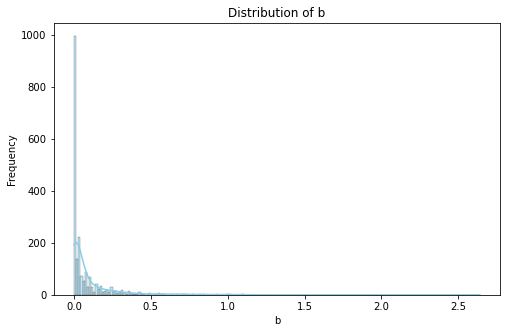

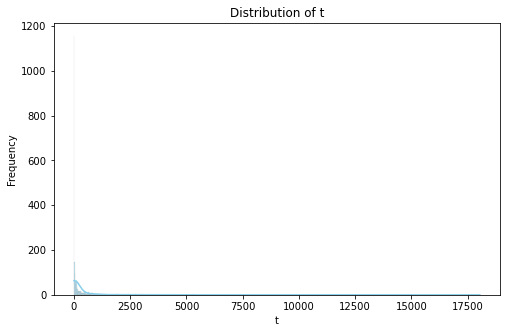

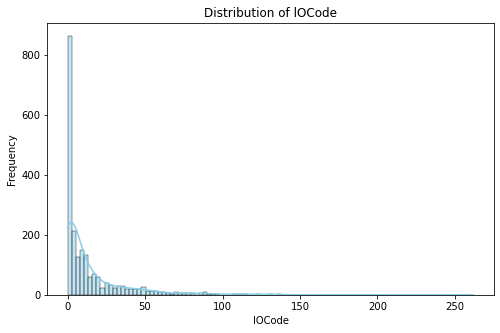

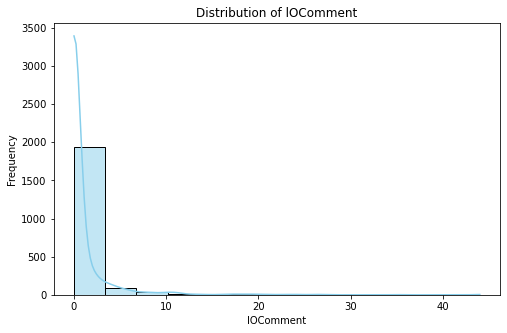

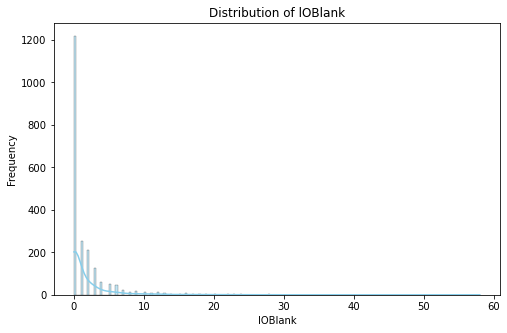

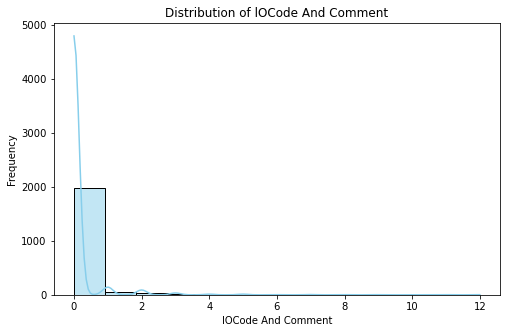

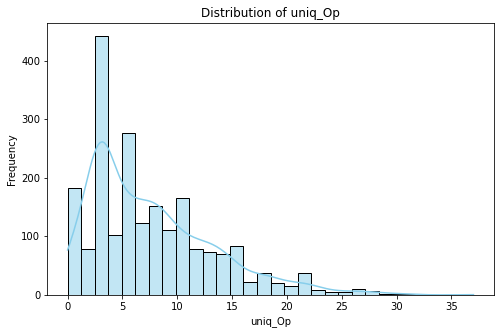

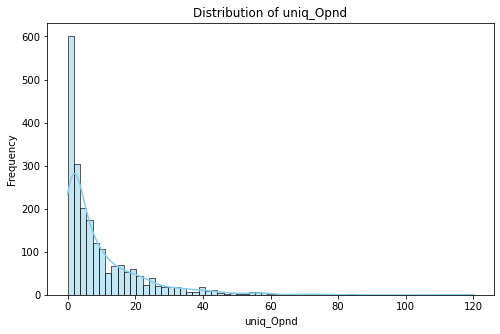

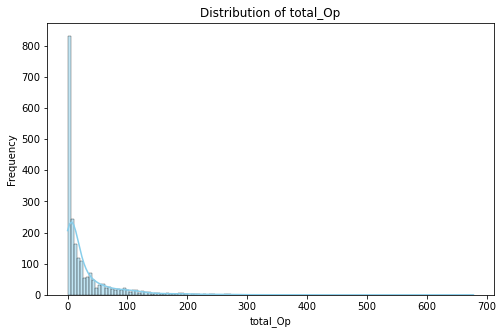

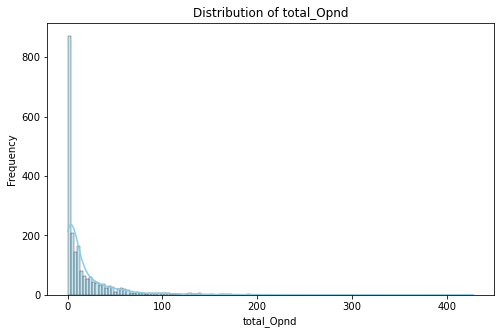

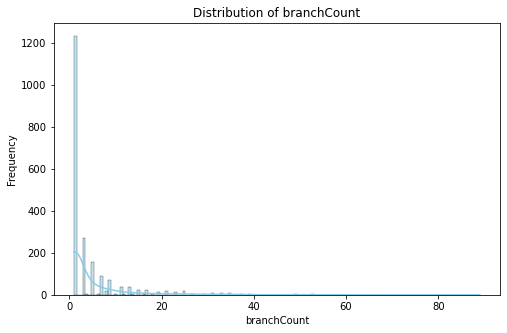

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/hp/Desktop/srp-class-csv.csv")

# Define feature columns and handle missing values
feature_columns = ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'lOCode And Comment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount','CLASS']

# Rename the columns
df.columns = feature_columns

# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
print("Columns:", df.columns)
print("Data types:\n", df.dtypes)
print("Summary statistics:\n", df.describe())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Visualize distributions of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [13]:
# Initialize KFold with 5 folds
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True)

# Lists to store performance metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
metrics = []

# Perform 5-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train_over, X_test_over = X.iloc[train_index], X.iloc[test_index]
    y_train_over, y_test_over = y.iloc[train_index], y.iloc[test_index]

    # Train RF_model classifier
    rf_clf.fit(X_train_over, y_train_over)

    # Make predictions
    y_pred = rf_clf.predict(X_test_over)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test_over, y_pred)
    #precision = precision_score(y_test_over, y_pred, average='macro')
    #recall = recall_score(y_test_over, y_pred, average='macro')
   # f1 = f1_score(y_test_over, y_pred, average='macro')

    # Append metrics to respective lists
    accuracy_scores.append(accuracy)
   # precision_scores.append(precision)
   # recall_scores.append(recall)
   # f1_scores.append(f1)

    # Print metrics for each fold
    print(f"Fold Accuracy: {accuracy}")

Fold Accuracy: 0.8649289099526066
Fold Accuracy: 0.8720379146919431
Fold Accuracy: 0.8696682464454977
Fold Accuracy: 0.8649289099526066
Fold Accuracy: 0.8527315914489311


In [14]:

from scipy.stats import randint

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(500, 1000, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }
from sklearn.model_selection import RandomizedSearchCV

rf_clf1 = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf_clf1,rs_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(X,y)

In [15]:
print('Best hyperparameters are: '+str(model_random.best_params_))
print('Best score is: '+str(model_random.best_score_))

Best hyperparameters are: {'criterion': 'gini', 'max_depth': 90, 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 800}
Best score is: 0.8468468468468467


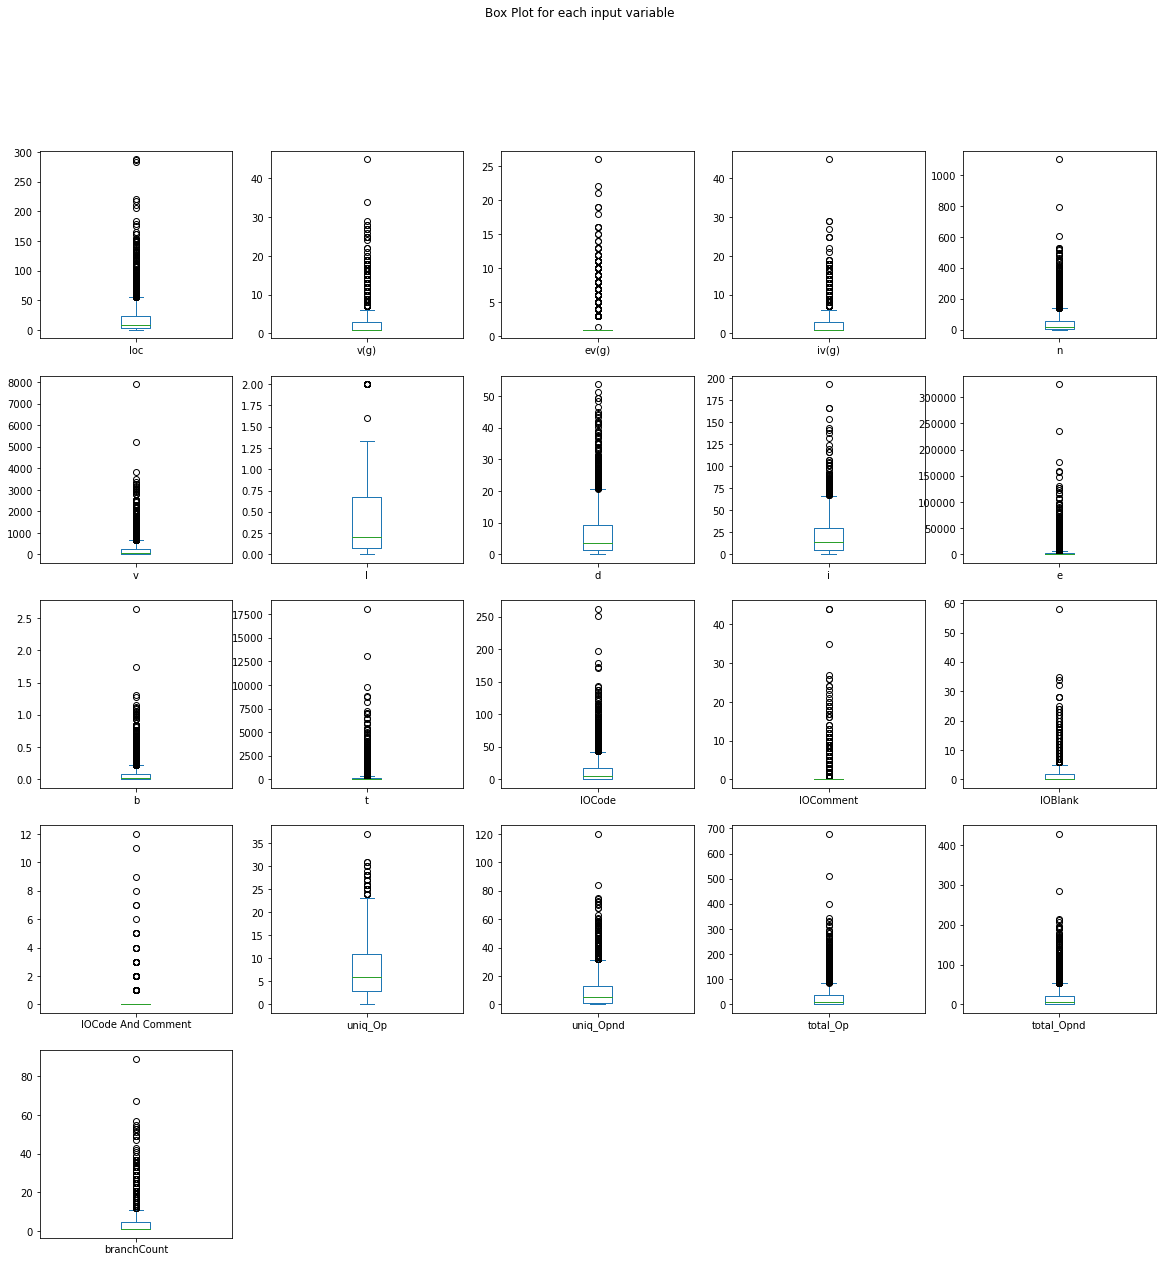

In [16]:

df.drop('CLASS', axis=1).plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20,20), 
                                        title='Box Plot for each input variable')
plt.savefig('box')
plt.show()

In [14]:
df = pd.read_csv("C:/Users/hp/Desktop/srp-class-csv.csv")
df.columns = feature_columns
X = df[feature_columns].drop("CLASS",axis=1)
y = df['CLASS']

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)
rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)
print("TRAINING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 


TRAINING RESULTS:
CONFUSION MATRIX:
 [[1249    1]
 [  15  211]]
ACCURACY SCORE:
 0.989159891598916
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.99      1.00      0.99      1250
        True       1.00      0.93      0.96       226

    accuracy                           0.99      1476
   macro avg       0.99      0.97      0.98      1476
weighted avg       0.99      0.99      0.99      1476


TESTING RESULTS:
CONFUSION MATRIX:
 [[511  22]
 [ 69  31]]
ACCURACY SCORE:
 0.8562401263823065
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.88      0.96      0.92       533
        True       0.58      0.31      0.41       100

    accuracy                           0.86       633
   macro avg       0.73      0.63      0.66       633
weighted avg       0.83      0.86      0.84       633



In [17]:
df = pd.read_csv("C:/Users/hp/Desktop/srp-class-csv.csv")
df.columns = feature_columns
X = df[feature_columns].drop("CLASS",axis=1)
y = df['CLASS']


In [16]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler(quantile_range = (0.1,0.9)).fit(X)
X4=rs.transform(X)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3, random_state=42)
rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)
print("TRAINING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 


TRAINING RESULTS:
CONFUSION MATRIX:
 [[1249    1]
 [  15  211]]
ACCURACY SCORE:
 0.989159891598916
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.99      1.00      0.99      1250
        True       1.00      0.93      0.96       226

    accuracy                           0.99      1476
   macro avg       0.99      0.97      0.98      1476
weighted avg       0.99      0.99      0.99      1476


TESTING RESULTS:
CONFUSION MATRIX:
 [[512  21]
 [ 68  32]]
ACCURACY SCORE:
 0.8593996840442338
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.88      0.96      0.92       533
        True       0.60      0.32      0.42       100

    accuracy                           0.86       633
   macro avg       0.74      0.64      0.67       633
weighted avg       0.84      0.86      0.84       633



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import plot_importance
df = pd.read_csv("C:/Users/hp/Desktop/srp-class-csv.csv")
feature_columns = ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'lOCode And Comment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount','CLASS']
df['CLASS'] = (df['CLASS'] == False).astype(int)
df.columns = feature_columns
X = df[feature_columns].drop("CLASS",axis=1)
y = df['CLASS']


In [22]:
df['CLASS'] = (df['CLASS'] == False).astype(int)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
np.seterr(divide='ignore', invalid='ignore')
DX = []
DY = []
for _ in range(len(X)):
    i = np.random.randint(0,len(X))
    DX.append(X[i])
    DY.append(y[i])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)
print("TRAINING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 


TRAINING RESULTS:
CONFUSION MATRIX:
 [[1249    1]
 [  15  211]]
ACCURACY SCORE:
 0.989159891598916
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.99      1.00      0.99      1250
        True       1.00      0.93      0.96       226

    accuracy                           0.99      1476
   macro avg       0.99      0.97      0.98      1476
weighted avg       0.99      0.99      0.99      1476


TESTING RESULTS:
CONFUSION MATRIX:
 [[512  21]
 [ 69  31]]
ACCURACY SCORE:
 0.8578199052132701
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.88      0.96      0.92       533
        True       0.60      0.31      0.41       100

    accuracy                           0.86       633
   macro avg       0.74      0.64      0.66       633
weighted avg       0.84      0.86      0.84       633



In [24]:
# Bagging Classifier
tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)
print("TRAINING RESULTS:Bagging Classifier")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 


# Extra Trees Classifier
ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)
print("TRAINING RESULTS:Extra Trees Classifier")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 
# AdaBoost Classifier
ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
print("TRAINING RESULTS:AdaBoost Classifier")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 

# Gradient Boosting Classifier
grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
print("TRAINING RESULTS:Gradient Boosting Classifier")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 

# Voting Classifier
estimators = [('Logistic', LogisticRegression(solver='liblinear')),
              ('Tree', DecisionTreeClassifier()),
              ('SVM', SVC(gamma='scale'))]
voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)
print("TRAINING RESULTS:Voting Classifier")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 

# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective="binary:logistic", colsample_bytree=0.3, learning_rate=0.1,
                            max_depth=5, alpha=10, n_estimators=50)
xgb_clf.fit(X_train, y_train)
print("TRAINING RESULTS:XGBoost Classifier")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 
# MLP Classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(22,22,22),activation='relu', max_iter=1000)
mlp_clf.fit(X_train, y_train)
print("TRAINING RESULTS:MLP Classifier")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 

# SVM Classifier
svm_clf = SVC(gamma='scale')
svm_clf.fit(X_train, y_train)
print("TRAINING RESULTS:SVM Classifier")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 


TRAINING RESULTS:Bagging Classifier
CONFUSION MATRIX:
 [[1249    1]
 [  15  211]]
ACCURACY SCORE:
 0.989159891598916
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1250
           1       1.00      0.93      0.96       226

    accuracy                           0.99      1476
   macro avg       0.99      0.97      0.98      1476
weighted avg       0.99      0.99      0.99      1476


TESTING RESULTS:
CONFUSION MATRIX:
 [[512  21]
 [ 69  31]]
ACCURACY SCORE:
 0.8578199052132701
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       533
           1       0.60      0.31      0.41       100

    accuracy                           0.86       633
   macro avg       0.74      0.64      0.66       633
weighted avg       0.84      0.86      0.84       633

TRAINING RESULTS:Extra Trees Classifier
CONFUSION MATRIX:
 [[1249    1]
 [  15  211]]

In [18]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
dataset = pd.read_csv('C:/Users/hp/Desktop/srp-class-csv.csv')
# split into input (X) and output (y) variables
dataset['CLASS'] = (dataset['CLASS'] == False).astype(int)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
np.seterr(divide='ignore', invalid='ignore')
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(21,), activation='relu'))
model.add(Dense(21, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/150
211/211 [==============================] - 2s 2ms/step - loss: 24.8634 - accuracy: 0.6534
Epoch 2/150
211/211 [==============================] - 0s 2ms/step - loss: 12.8695 - accuracy: 0.8080
Epoch 3/150
211/211 [==============================] - 0s 2ms/step - loss: 4.9401 - accuracy: 0.8255
Epoch 4/150
211/211 [==============================] - 0s 2ms/step - loss: 8.9297 - accuracy: 0.8179
Epoch 5/150
211/211 [==============================] - 0s 2ms/step - loss: 12.4479 - accuracy: 0.7971
Epoch 6/150
211/211 [==============================] - 0s 1ms/step - loss: 19.7338 - accuracy: 0.7999
Epoch 7/150
211/211 [==============================] - 0s 2ms/step - loss: 12.1363 - accuracy: 0.8260
Epoch 8/150
211/211 [==============================] - 0s 2ms/step - loss: 10.3895 - accuracy: 0.8127
Epoch 9/150
211/211 [==============================] - 0s 2ms/step - loss: 12.6359 - accuracy: 0.8165
Epoch 10/150
211/211 [==============================] - 0s 1ms/step - loss: 11.1451 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               2816      
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
15/15 [==============================] - 1s 13ms/step - loss: 50.4504 - accuracy: 0.6463 - val_loss: 2.9898 - val_accuracy: 0.7899
Epoch 2/30
15/15 [==============================] - 0s 5ms/step - loss: 6.4567 - accuracy: 0.7967 - val_loss: 13.1424 - val_accuracy: 0.7567
Epoch 3/30
15/15 [==============================] - 0s 5ms/step - loss: 8.5372 - accuracy: 0.8137 - val_loss: 8.1700 - val_accuracy: 0.8420
Epoch 4/30
15/15 [=======

[]

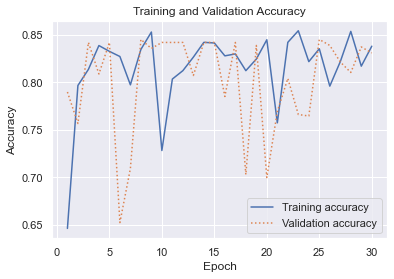

In [19]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=21))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=100)

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import plot_importance

# Load the dataset
df = pd.read_csv("C:/Users/hp/Desktop/srp-class-csv.csv")

# Check for missing values
df.isnull().sum()

# Define feature columns and handle missing values
feature_columns = ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'lOCode And Comment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount','CLASS']

# Rename the columns
df.columns = feature_columns
sel_column=['loc','l', 'd']

# Split the data into train and test sets
X = df[sel_column]
y = df['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)
print("TRAINING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 


TRAINING RESULTS:
CONFUSION MATRIX:
 [[1247    3]
 [  35  191]]
ACCURACY SCORE:
 0.9742547425474255
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.97      1.00      0.98      1250
        True       0.98      0.85      0.91       226

    accuracy                           0.97      1476
   macro avg       0.98      0.92      0.95      1476
weighted avg       0.97      0.97      0.97      1476


TESTING RESULTS:
CONFUSION MATRIX:
 [[491  42]
 [ 70  30]]
ACCURACY SCORE:
 0.8230647709320695
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.88      0.92      0.90       533
        True       0.42      0.30      0.35       100

    accuracy                           0.82       633
   macro avg       0.65      0.61      0.62       633
weighted avg       0.80      0.82      0.81       633



In [21]:
# Bagging Classifier
tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)
print("TRAINING RESULTS:Bagging Classifier")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 


# Extra Trees Classifier
ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=3, random_state=42)
ex_tree_clf.fit(X_train, y_train)
print("TRAINING RESULTS:Extra Trees Classifier")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 
# AdaBoost Classifier
ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
print("TRAINING RESULTS:AdaBoost Classifier")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 

# Gradient Boosting Classifier
grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
print("TRAINING RESULTS:Gradient Boosting Classifier")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 

# Voting Classifier
estimators = [('Logistic', LogisticRegression(solver='liblinear')),
              ('Tree', DecisionTreeClassifier()),
              ('SVM', SVC(gamma='scale'))]
voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)
print("TRAINING RESULTS:Voting Classifier")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 

# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective="binary:logistic", colsample_bytree=0.3, learning_rate=0.1,
                            max_depth=5, alpha=10, n_estimators=50)
xgb_clf.fit(X_train, y_train)
print("TRAINING RESULTS:XGBoost Classifier")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 
# MLP Classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(22,22,22),activation='relu', max_iter=1000)
mlp_clf.fit(X_train, y_train)
print("TRAINING RESULTS:MLP Classifier")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 

# SVM Classifier
svm_clf = SVC(gamma='scale')
svm_clf.fit(X_train, y_train)
print("TRAINING RESULTS:SVM Classifier")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_train, y_train_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_train, y_train_pred))
print("\nTESTING RESULTS:")
print("===============================")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_test_pred))
print("ACCURACY SCORE:\n", accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_test_pred)) 


TRAINING RESULTS:Bagging Classifier
CONFUSION MATRIX:
 [[1249    1]
 [  15  211]]
ACCURACY SCORE:
 0.989159891598916
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.99      1.00      0.99      1250
        True       1.00      0.93      0.96       226

    accuracy                           0.99      1476
   macro avg       0.99      0.97      0.98      1476
weighted avg       0.99      0.99      0.99      1476


TESTING RESULTS:
CONFUSION MATRIX:
 [[512  21]
 [ 69  31]]
ACCURACY SCORE:
 0.8578199052132701
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.88      0.96      0.92       533
        True       0.60      0.31      0.41       100

    accuracy                           0.86       633
   macro avg       0.74      0.64      0.66       633
weighted avg       0.84      0.86      0.84       633

TRAINING RESULTS:Extra Trees Classifier
CONFUSION MATRIX:
 [[1249    1]
 [  15  211]]